# IRIS FLOWERS CLASSIFICATION 

In this Machine Learning Model , we are going to classify the types of iris flowers on the basis of sepal width , sepal length, petal width, petal length. The dataset is an inbuilt dataset in sklearn library which we are going to use .

# Loading and Exploring the Dataset

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

Converting the iris.data dataset into a dataframe to easily visualize the attributes

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=iris.target

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Adding a column named target 

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.corr()['target']

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

By seeing the correlation we can say that the most affecting factor are petal length,width and the least affecting is the sepal width.

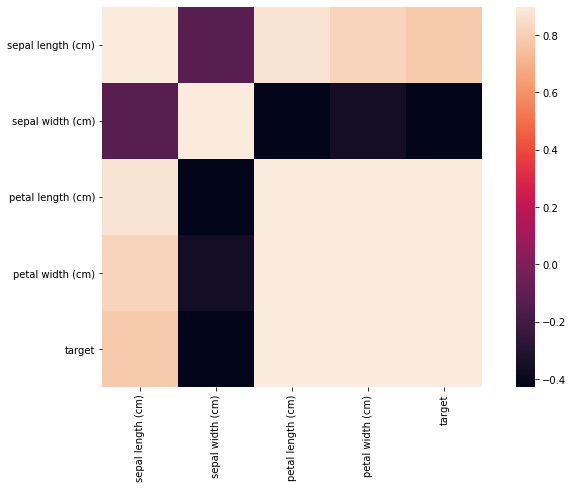

In [11]:
correalation_metrics = df.corr()
fig=plt.figure(figsize = (12,7))
sns.heatmap(correalation_metrics, vmax=.9, square= True)
plt.show()

Changing the target values to the value names to get a better understanding

In [12]:
df.target=df.target.apply( lambda x:
                         iris.target_names[x])

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

<AxesSubplot:xlabel='petal width (cm)'>

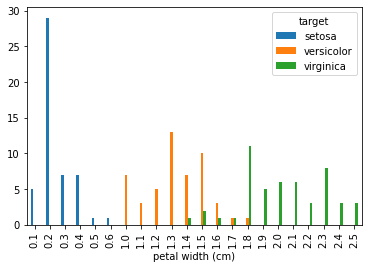

In [34]:
pd.crosstab(df['petal width (cm)'],df.target).plot(kind='bar')

<AxesSubplot:xlabel='sepal width (cm)'>

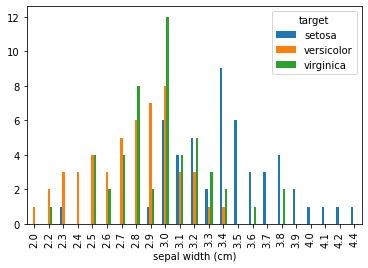

In [40]:
pd.crosstab(df['sepal width (cm)'],df.target).plot(kind='bar')

<AxesSubplot:xlabel='petal length (cm)'>

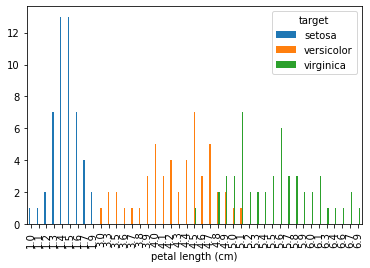

In [42]:
pd.crosstab(df['petal length (cm)'],df.target).plot(kind='bar')

<AxesSubplot:xlabel='sepal length (cm)'>

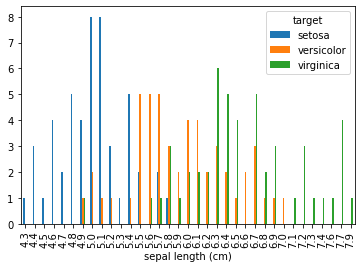

In [43]:
pd.crosstab(df['sepal length (cm)'],df.target).plot(kind='bar')

# TRAIN - TEST SPLITTING

In [14]:
x=df.drop(['target'],axis='columns')
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
model= LogisticRegression()

In [20]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
model.score(xtest,ytest)

0.9666666666666667

In [22]:
y_predicted = model.predict(xtest)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

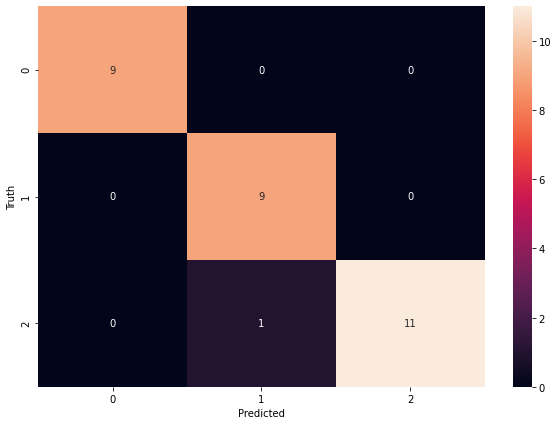

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# CROSS VALIDATION SCORE FOR DIFFERENT MODELS 

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(LinearRegression(),x,y).mean()

0.32256072489000853

In [27]:
cross_val_score(LogisticRegression(),x,y).mean()

c:\users\manish adhikari\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [28]:
cross_val_score(DecisionTreeClassifier(),x,y).mean()

0.9666666666666668

In [29]:
cross_val_score(RandomForestClassifier(),x,y).mean()

0.96

From this we can conclude that using LOGISTIC REGRESSION would give us the best prediciton values.